# Machine Learning Engineer Nanodegree

# Capstone: Predicting Loan Defaults In Peer-To-Peer Lending

## I. Getting Started
In this project, we will analyze a dataset containing data on potential borrowers. The goal of this project is to build a model predicting the loan default of potential borrowers. 

The dataset for this project can be found on [Lending Club](https://www.lendingclub.com/info/download-data.action).


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline
plt.style.use('fivethirtyeight')

# Load the accepted loan dataset 
# low_memory and skiprows in read_csv because the file is large and it leads to the Lending Club website
try:
    loan_data = pd.read_csv("LoanStats3a.csv", low_memory = False, skiprows = 1)
    print("The loan dataset has {} samples with {} features.".format(*loan_data.shape))
except:
    print("The loan dataset could not be loaded. Is the dataset missing?")

The loan dataset has 42538 samples with 111 features.


## Introduction To The Data

The dictionary data file is provided with the project in order to refer to it later in our data exploration. This contains information about the various columns and will be useful when we clean up the dataset. The data being used is the data from 2007 to 2011 mostly because when can be almost certain that all the loans have been either repaid or defaulted upon. Let's dive in.

In [2]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_data.iloc[0]

id                              1077501
member_id                     1296599.0
loan_amnt                        5000.0
funded_amnt                      5000.0
funded_amnt_inv                  4975.0
                                ...    
tax_liens                           0.0
tot_hi_cred_lim                     NaN
total_bal_ex_mort                   NaN
total_bc_limit                      NaN
total_il_high_credit_limit          NaN
Name: 0, Length: 111, dtype: object

As we can see, the number of columns will be something to work on. We will remove the *`desc`* and *`url`* columns mostly because it leads to or describes information that is not necessary for our analysis.  

In [4]:
loan_data = loan_data.drop(['desc', 'url'],axis=1)

In [5]:
loan_data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,15609.000000,...,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,1.081424,35.017618,...,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN
std,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,1.527455,22.418427,...,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,17.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,33.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,51.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,120.000000,...,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN


Another notable thing to remove is to remove columns with more than 50% missing values. It would be time consuming and inefficient to deal with the tremendous amount of missing values from these columns.

In [6]:
# count half point of the dataset.
half_point = len(loan_data) / 2
loan_data = loan_data.dropna(thresh=half_point, axis=1)
# we save the new file
loan_data.to_csv('loan_data.csv', index=False)

We reload the data in the notebook and take a look at the first row.

In [7]:
loan_data = pd.read_csv('loan_data.csv', low_memory = False)
loan_data.drop_duplicates()

loan_data.iloc[0]

id                                1077501
member_id                       1296599.0
loan_amnt                          5000.0
funded_amnt                        5000.0
funded_amnt_inv                    4975.0
term                            36 months
int_rate                           10.65%
installment                        162.87
grade                                   B
sub_grade                              B2
emp_title                             NaN
emp_length                      10+ years
home_ownership                       RENT
annual_inc                        24000.0
verification_status              Verified
issue_d                          Dec-2011
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
zip_code                            860xx
addr_state                             AZ
dti                                 27.65
delinq_2yrs                       

In [8]:
loan_data.shape[1]

52

## II. Analysis

### Features Meaning and Usefulness
We will use the first entry of the `loan_data.csv` file to explore the meaning of the remaining 52 columns. 

In [9]:
first_entry = loan_data.iloc[0]
first_entry.to_csv('first_entry.csv', index = True)

In [10]:
description = pd.read_csv('LCDataDictionary.csv', encoding='latin1')

description.shape

(117, 3)

In [11]:
import csv
list_first_entry = open('first_entry.csv', 'r')
first_csvreader = csv.reader(list_first_entry)
first_list = list(first_csvreader)

list_data_dictio = open('LCDataDictionary.csv', 'r')
second_csvreader = csv.reader(list_data_dictio)
second_list = list(second_csvreader)

table = []
for row in first_list:
    table.append(row[0])

new_table = []
for col in second_list:
    if col[0] in table:
        new_table.append(col)

In [12]:
print(len(new_table))

54


In [13]:
print(new_table)

[['acc_now_delinq', 'The number of accounts on which the borrower is now delinquent.', ''], ['addr_state', 'The state provided by the borrower in the loan application', ''], ['annual_inc', 'The self-reported annual income provided by the borrower during registration.', ''], ['application_type', 'Indicates whether the loan is an individual application or a joint application with two co-borrowers', ''], ['chargeoff_within_12_mths', 'Number of charge-offs within 12 months', ''], ['collection_recovery_fee', 'post charge off collection fee', ''], ['collections_12_mths_ex_med', 'Number of collections in 12 months excluding medical collections', ''], ['delinq_2yrs', "The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years", ''], ['delinq_amnt', 'The past-due amount owed for the accounts on which the borrower is now delinquent.', ''], ['dti', 'A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 

In [14]:
print(len(new_table[0]))

3


In [15]:
print(len(['Variable','Description']))

2


In [16]:
new_table = [row[:2] for row in new_table]

In [17]:
df_table = pd.DataFrame(new_table, columns = ['Variable', 'Description'])

In [18]:
df_table = df_table.set_index(['Variable', 'Description'])

### First Set Of Features
By analyzing the first 13 features, we understand that we can remove the *`id`* and *`member_id`* feature because it does not tell us anything about the person, these are arbitrary features given by Lending Club.

The *`funded_amnt`* and *`funded_amnt_inv`* are both features about the future the loan has been approved at that point and cannot be considered in our model. *`grade`* and *`sub_grade`* are recurring data  that we already have with (or a different angle on) the *`int_rate`* feature, thus we can dispose of them. 

Finally, although it could be an area of improvement in our model, the *`emp_title`* feature would be a hard feature to evaluate. Some form of sentiment analysis would need to be used and certain metrics would need to provide a good estimate of a title's meaning and value in the lending context. We will refrain ourselves in delving deeper, but we noticed this could be an interesting data science side project.  

In [19]:
first_13 = ['id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','term',
            'int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership']
df_table.loc[first_13]

,
Variable,Description
id,A unique LC assigned ID for the loan listing.
member_id,A unique LC assigned Id for the borrower member.
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
funded_amnt,The total amount committed to that loan at that point in time.
funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade


In [20]:
#We drop the columns enumerated in the cell above.
loan_data = loan_data.drop(['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 
                              'grade', 'sub_grade', 'emp_title'], axis =1)

### Second Set Of Features
The next 13 features contain *`issue_d`*, this is data about the month the loan was funded, this means it leaks a future information, we need to remove it. The *`zip_code`* is a column that does not add any value because we already have the state adress with *`addr_state`*. The *`zip_code`* could be used with other economic data to uncover a relationship with the environnement in which a person lives and the risk of default, but this could be seen as discriminatory practice and we only have the first 3 digits of the code area.

In [21]:
second_13 = ['annual_inc','verification_status','issue_d','loan_status','pymnt_plan','purpose',
             'title','zip_code','addr_state','dti','delinq_2yrs','earliest_cr_line', 'inq_last_6mths']
df_table.loc[second_13]

,
Variable,Description
annual_inc,The self-reported annual income provided by the borrower during registration.
verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"
issue_d,The month which the loan was funded
loan_status,Current status of the loan
pymnt_plan,Indicates if a payment plan has been put in place for the loan
purpose,A category provided by the borrower for the loan request.
title,The loan title provided by the borrower
zip_code,The first 3 numbers of the zip code provided by the borrower in the loan application.
addr_state,The state provided by the borrower in the loan application


In [22]:
loan_data = loan_data.drop(['issue_d','zip_code'], axis =1)

### Third Set Of Features
The following 5 variables are all about the future, they inform us about how the repayment is going, *`out_prncp`*, *`out_prncp_inv`*, *`total_pymnt`*, *`total_pymnt_inv`*, *`total_rec_prncp`*. We need to remove them from our model. The *`total_rec_int`* is about the interest received to date (meaning the loan has been approved) and *`total_rec_late_fee`* is about the interest that are late. These 2 variables need to be removed from the dataset.

In [23]:
third_13 = ['open_acc', 'pub_rec', 'revol_bal','revol_util','total_acc', 'initial_list_status','out_prncp',
            'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int', 'total_rec_late_fee']
df_table.loc[third_13]

,
Variable,Description
open_acc,The number of open credit lines in the borrower's credit file.
pub_rec,Number of derogatory public records
revol_bal,Total credit revolving balance
revol_util,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
total_acc,The total number of credit lines currently in the borrower's credit file
initial_list_status,"The initial listing status of the loan. Possible values are – W, F"
out_prncp,Remaining outstanding principal for total amount funded
out_prncp_inv,Remaining outstanding principal for portion of total amount funded by investors
total_pymnt,Payments received to date for total amount funded


In [24]:
loan_data = loan_data.drop(['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                              'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee'], axis =1)

### Fourth Set Of Features
Finally, the last set of 13 features contain *`recoveries`* and *`collection_recovery_fee`* which are both leak from the future about the loan. And *`last_pymnt_d`* and *`last_pmyny_amnt`* are about the end of repayment, which means we cannot know that in advance.    

In [25]:
fourth_13 = ['recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d',
             'collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths',
             'delinq_amnt','pub_rec_bankruptcies','tax_liens']
df_table.loc[fourth_13]

,
Variable,Description
recoveries,post charge off gross recovery
collection_recovery_fee,post charge off collection fee
last_pymnt_d,Last month payment was received
last_pymnt_amnt,Last total payment amount received
last_credit_pull_d,The most recent month LC pulled credit for this loan
collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
policy_code,publicly available policy_code=1\nnew products not publicly available policy_code=2
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
acc_now_delinq,The number of accounts on which the borrower is now delinquent.


In [26]:
loan_data = loan_data.drop(['recoveries', 'collection_recovery_fee', 
                              'last_pymnt_d', 'last_pymnt_amnt'], axis =1)

In [27]:
loan_data.shape

(42538, 32)

We now have 32 columns to work with. We removed 20 columns of unuseful information and this will make the data easier to process and fit with the machine learning algorithm. But we are not done.

### Target Column
The target column is a critical part when fitting this type of data to machine learning algorithms because it tries to make prediction based on the outcome that we want. In this particular case, we want to predict the loan status (*`loan_status`*) which can take many values (9) in total. 

In [28]:
loan_data['loan_status'].value_counts()

loan_status
Fully Paid                                             34085
Charged Off                                             5662
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                   19
Late (31-120 days)                                         9
In Grace Period                                            8
Late (16-30 days)                                          2
Default                                                    1
Name: count, dtype: int64

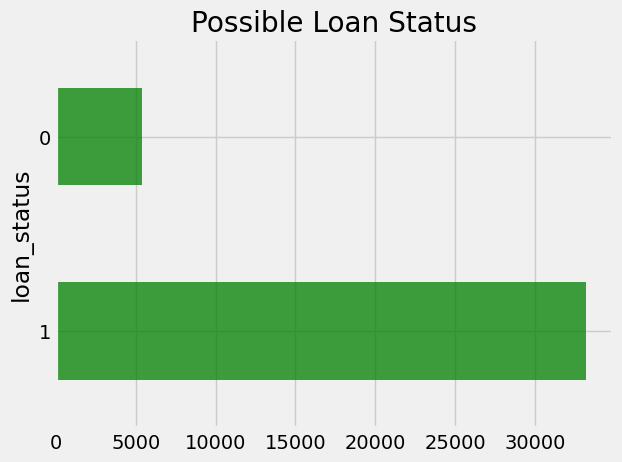

In [76]:
loan_data['loan_status'].value_counts().plot(kind= 'barh', color = 'green', title = 'Possible Loan Status', alpha = 0.75)
plt.show()

We have 9 possibility for *`loan_status`* and only 2 values are important in our model's binary classification; fully paid and charged off. These 2 values indicate the result of the loan outcome. We will remove the other possibilities and avoid "translating" those values into the binary possibility (fully paid or charged off).

In [30]:
loan_data = loan_data[(loan_data['loan_status'] == "Fully Paid") | (loan_data['loan_status'] == "Charged Off")]

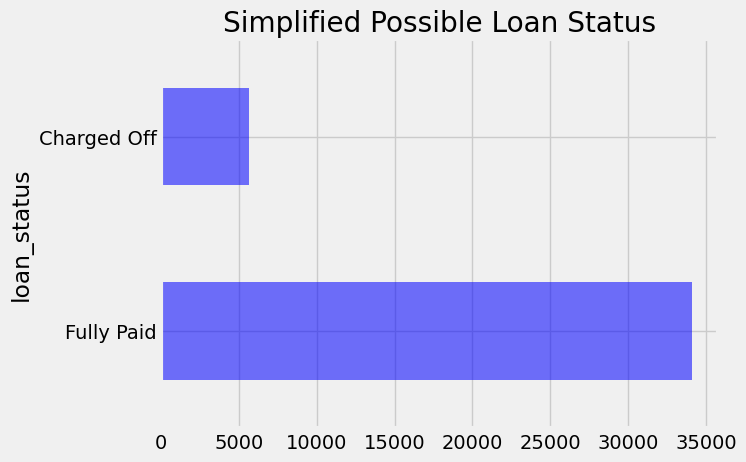

In [31]:
loan_data['loan_status'].value_counts().plot(kind= 'barh', color = 'blue', title = 'Simplified Possible Loan Status', alpha = 0.55)
plt.show()

We need to change the object value to numerical for the algorithm processing. Let's use a dictionary.

In [32]:
status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}
loan_data = loan_data.replace(status_replace)

C:\Users\user\AppData\Local\Temp\ipykernel_13072\770176543.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data = loan_data.replace(status_replace)


In [33]:
loan_data['loan_status'].value_counts()

loan_status
1    34085
0     5662
Name: count, dtype: int64

In [34]:
loan_data.shape

(39747, 32)

### Final Data Cleaning
Single value columns are not information that help our model, it does not provide any insight into the likelihood of default or repayment, and will be removed from the dataset.

In [35]:
orig_columns = loan_data.columns
drop_columns = []
for col in orig_columns:
    col_series = loan_data[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loan_data = loan_data.drop(drop_columns, axis = 1)
drop_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [36]:
loan_data.shape

(39747, 23)

We were able to remove 9 columns and we are left with 23 features to work with. 

## III. Methodology

### Preparing The Features: Dealing With Missing Values
We start with the filtered *loan_data.csv* from the previous analysis. Do we have many Null values in the file loan_data? We will look at how we can handle these values. We need to deal with non-numeric value and null values, because scikit-learn assume that the values are numeric and filled, otherwise it could throw an error or miss evaluate the data.

In [37]:
null_counts = loan_data.isnull().sum()
null_counts

loan_amnt                  0
term                       0
int_rate                   0
installment                0
emp_length              1076
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

We have 4 columns with missing values: 2 with *`last_credit_pull_d`*, 10 with *`title`*, 50 with *`revol_util`* and 697 with *`pub_rec_bankruptcies`* . Instead of removing the columns as we did earlier, we will remove the rows. We consider rows as incomplete (in a real life setting, we would reject the application simply because it is not complete).

In [38]:
loan_data = loan_data.drop("pub_rec_bankruptcies", axis=1)
loan_data = loan_data.dropna(axis=0)

In [39]:
loan_data.shape

(38612, 22)

### Handling Non-Numeric Data Types 
The data types of columns are important to look at and we will need to deal with non-numeric values in order to encode and use them in our machine learning algorithms. 

In [40]:
print(loan_data.dtypes.value_counts())

object     11
float64    10
int64       1
Name: count, dtype: int64


We have 11 objects that need to be addressed, let's explore them.

In [41]:
object_columns_df = loan_data.select_dtypes(include=["object"])
print(object_columns_df.iloc[0])

term                     36 months
int_rate                    10.65%
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Dec-2016
Name: 0, dtype: object


Some of the data seems categorical, this means that we might be able to change it into numerical. Let's count the number of occurences of each column. 

- *`term`* is either 36 or 60. 

- *`emp_length`* is the "Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years."

- *`home_ownership`* can only be 1 of 4 categorical data.

- *`verification_status`* "Indicates if income was verified by (Lending Club), not verified, or if the income source was verified". One of 2 choices. 

- *`addr_state`*: "The state provided by the borrower in the loan application"

In [42]:
columns = ['term', 'emp_length', 'home_ownership', 'verification_status', 'addr_state']
for col in columns:
    print(loan_data[col].value_counts())
    print( " " )

term
36 months    28234
60 months    10378
Name: count, dtype: int64
 
emp_length
10+ years    8886
< 1 year     4573
2 years      4387
3 years      4090
4 years      3429
5 years      3279
1 year       3236
6 years      2224
7 years      1770
8 years      1480
9 years      1258
Name: count, dtype: int64
 
home_ownership
RENT        18451
MORTGAGE    17226
OWN          2836
OTHER          96
NONE            3
Name: count, dtype: int64
 
verification_status
Not Verified       16466
Verified           12354
Source Verified     9792
Name: count, dtype: int64
 
addr_state
CA    6903
NY    3707
FL    2776
TX    2672
NJ    1821
IL    1486
PA    1480
VA    1377
GA    1357
MA    1312
OH    1190
MD    1033
AZ     831
WA     806
CO     768
NC     760
CT     733
MI     688
MO     661
MN     591
NV     482
SC     464
WI     444
OR     434
AL     431
LA     426
KY     323
OK     293
KS     260
UT     252
AR     235
DC     212
RI     197
NM     183
HI     169
WV     168
NH     162
DE     110
WY     

The previous four columns contain a couple categorical values, we will encode them as dummy variables for our model. We will remove the *`addr_state`* because if we were to encode all these variables, we would make our dataframe quite large and would slow the computation done by our machine learning algorithm.

Let's now take a look at the next columns:
- *`purpose`* is "a category provided by the borrower for the loan request". 

- *`title`* : "The loan title provided by the borrower"


In [43]:
print (loan_data["purpose"].value_counts())
print (" ")
print (loan_data["title"].value_counts())

purpose
debt_consolidation    18239
credit_card            4999
other                  3821
home_improvement       2883
major_purchase         2108
small_business         1779
car                    1497
wedding                 934
medical                 668
moving                  557
house                   369
vacation                351
educational             312
renewable_energy         95
Name: count, dtype: int64
 
title
Debt Consolidation            2145
Debt Consolidation Loan       1691
Personal Loan                  643
Consolidation                  508
debt consolidation             488
                              ... 
Last Credit Card Refinance       1
Fidelity Payoff                  1
DYLAN'S PERSONAL LOAN            1
Pay down debt loan               1
JAL Loan                         1
Name: count, Length: 19133, dtype: int64


The 2 columns seem to have similar information. We will keep the *`purpose`* column as the *`title`* column is probably added by the customer and can vary. The purpose is streamlined in comparison with the *`title`* containing a lot of the same just under a different form (debt consolidation written in different ways).

The next values are dates.

- *`earliest_cr_line`*: "The month the borrower's earliest reported credit line was opened"

- *`last_credit_pull_d`*: "The most recent month LC pulled credit for this loan"


These values are a already numerical, but mean something else. 
- *`int_rate`* is the percentage of the interest, that way we know that it is x%.

- *`revol_util`*: "Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."

The reason the loan was asked for. 

We need to encode categorical value with dummy variables. 

In [44]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
loan_data = loan_data.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"], axis=1)
loan_data["int_rate"] = loan_data["int_rate"].str.rstrip("%").astype("float")
loan_data["revol_util"] = loan_data["revol_util"].str.rstrip("%").astype("float")
loan_data = loan_data.replace(mapping_dict)

C:\Users\user\AppData\Local\Temp\ipykernel_13072\367328925.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data = loan_data.replace(mapping_dict)


Now, let's encode the previous variables.

In [45]:
categorical_columns = ["home_ownership", "verification_status", "emp_length", "purpose", "term"]
dummy_df = pd.get_dummies(loan_data[categorical_columns])
loan_data = pd.concat([loan_data, dummy_df], axis=1)
loan_data = loan_data.drop(categorical_columns, axis=1)

In [46]:
loan_data.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,24000.0,1,27.65,0.0,1.0,3.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,2500.0,15.27,59.83,30000.0,0,1.00,0.0,5.0,3.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,2400.0,15.96,84.33,12252.0,1,8.72,0.0,2.0,2.0,0.0,...,False,False,False,False,False,True,False,False,True,False
3,10000.0,13.49,339.31,49200.0,1,20.00,0.0,1.0,10.0,0.0,...,False,False,False,True,False,False,False,False,True,False
5,5000.0,7.90,156.46,36000.0,1,11.20,0.0,3.0,9.0,0.0,...,False,False,False,False,False,False,False,True,True,False


In [47]:
# cleaned and filtered data to csv
loan_data.to_csv('clean_loan_data.csv', index = False)

## IV. Model Evaluation And Validation
### Machine Learning Algorithm Fitting
In this part, now that we have cleaned the dataset and encoded the variable with dummy encoding to process categorical data, let's dive in the first machine learning algorithm that we will try to use on the data set. But before, let's see the result of our work on the dataset.

In [48]:
loan_data = pd.read_csv('clean_loan_data.csv')

In [49]:
loan_data

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,24000.0,1,27.65,0.0,1.0,3.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,2500.0,15.27,59.83,30000.0,0,1.00,0.0,5.0,3.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,2400.0,15.96,84.33,12252.0,1,8.72,0.0,2.0,2.0,0.0,...,False,False,False,False,False,True,False,False,True,False
3,10000.0,13.49,339.31,49200.0,1,20.00,0.0,1.0,10.0,0.0,...,False,False,False,True,False,False,False,False,True,False
4,5000.0,7.90,156.46,36000.0,1,11.20,0.0,3.0,9.0,0.0,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38607,2500.0,8.07,78.42,110000.0,1,11.33,0.0,0.0,13.0,0.0,...,False,False,False,False,False,False,False,False,True,False
38608,8500.0,10.28,275.38,18000.0,1,6.40,1.0,1.0,6.0,0.0,...,False,False,False,False,False,False,False,False,True,False
38609,5000.0,8.07,156.84,100000.0,1,2.30,0.0,0.0,11.0,0.0,...,False,False,False,False,False,False,False,False,True,False
38610,5000.0,7.43,155.38,200000.0,1,3.72,0.0,0.0,17.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [50]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38612 entries, 0 to 38611
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38612 non-null  float64
 1   int_rate                             38612 non-null  float64
 2   installment                          38612 non-null  float64
 3   annual_inc                           38612 non-null  float64
 4   loan_status                          38612 non-null  int64  
 5   dti                                  38612 non-null  float64
 6   delinq_2yrs                          38612 non-null  float64
 7   inq_last_6mths                       38612 non-null  float64
 8   open_acc                             38612 non-null  float64
 9   pub_rec                              38612 non-null  float64
 10  revol_bal                            38612 non-null  float64
 11  revol_util                  

### Evaluation Benchmark And Error Metrics
We talked about the need of a conservative evaluation of the default rate. We must also keep in mind that there is a strong imbalance with the target category of loan repayment in the dataset, because about 6 out of 7 loans are repaid. Meaning that we could lend money all the time (always predicting that the borrower would repay) and be right about 85.71% of the time that the loan would be repaid, but that would mean that the model would not be profitable. Say we lend \$1000 at 10% interest, we would expect a return of \$100 on each loan. But if we run the experiment 7 times, we would earn \$600 (6 x \$100) and lose \$1000 (the defaulter), we are left with a \$400 loss. Hardly a profitable enterprise. The benchmark needs to encompass the weight of the defaulter and the optimization between the true positive rate (good borrowers) and the false positive rate (bad borrowers). This implies that we need to ensure a viable machine learning model and predict a higher percentage of potential defaulters in order to avoid lending to them. The benchmark must beat the 85.71% average loan repayment. Although “money is left on the table”, a conservative investor would prefer a steady return on her investment than suffer the 1 in 7 loss. 

In the markdown cell above, we talked about the class imbalance and that it could lead to an unprofitable model. If we were to lend to all borrowers, we would most likely lose 1 in 7 times and take a larger loss in that one time than in the 6 others' interest. In the code below, we check the true positive and false positive rate.

In [51]:
predictions = pd.Series(np.ones(loan_data.shape[0]))

false_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 0)
false_positive = len(predictions[false_positive_filter])

true_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 1)
true_positive = len(predictions[true_positive_filter])

false_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 1)
false_negative = len(predictions[false_negative_filter])

true_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 0)
true_negative = len(predictions[true_negative_filter])

true_positive_rate = true_positive / (true_positive + false_negative)
false_positive_rate = false_positive / (false_positive + true_negative)

print (float(true_positive_rate))
print (float(false_positive_rate))

1.0
1.0


In [52]:
accuracy = float(true_positive + true_negative)/float(true_positive + false_positive+ false_negative + true_negative)
accuracy

0.8597586242618875

In [53]:
precision = float(true_positive)/float(true_positive + false_positive)
precision

0.8597586242618875

We got 100% of the true positive loans but also 100% or the false positive because we predicted that all loans would be paid off. As a reminder, the pie chart below is a different way to visualize the class imbalance on the dataset. 

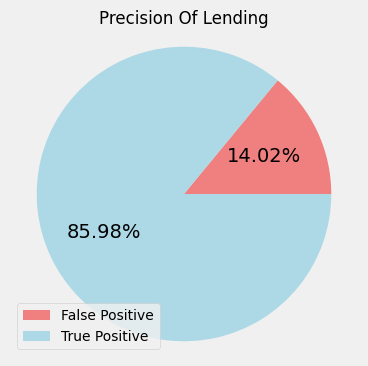

In [54]:
# Data to plot
labels = 'False Positive', 'True Positive'
sizes = [1-precision, precision]
colors = ['lightcoral', 'lightblue'] 
# Plot
plt.figure(figsize=(4,4))
plt.pie(sizes, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.title('Precision Of Lending', fontsize=12) 
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()

### Logistic Regression Classification

Let's try to improve the predictions with logistic regression. 

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

cols = loan_data.columns
train_cols = cols.drop('loan_status')

features = loan_data[train_cols]

target = loan_data['loan_status']

lr.fit(features, target)
predictions = lr.predict(features)

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The previous predictions are overfitting, we need to cross-validate them.

In [56]:
'''from sklearn.cross_validation import cross_val_predict, KFold
lr = LogisticRegression()
kf = KFold(features.shape[0], random_state=42)
predictions = cross_val_predict(lr, features, target, cv=kf)
predictions = pd.Series(predictions)'''

from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression
import pandas as pd

lr = LogisticRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predictions = cross_val_predict(lr, features, target, cv=kf)
predictions = pd.Series(predictions)


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [57]:
false_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 0)
false_positive = len(predictions[false_positive_filter])

true_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 1)
true_positive = len(predictions[true_positive_filter])

false_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 1)
false_negative = len(predictions[false_negative_filter])

true_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 0)
true_negative = len(predictions[true_negative_filter])

true_positive_rate = float(true_positive)/float((true_positive + false_negative))
false_positive_rate = float(false_positive)/float((false_positive + true_negative))

print (float(true_positive_rate))
print (float(false_positive_rate))

0.9993975359219207
0.9990766389658357


In [58]:
precision = float(true_positive)/float(true_positive + false_positive)
precision

0.8597973410734185

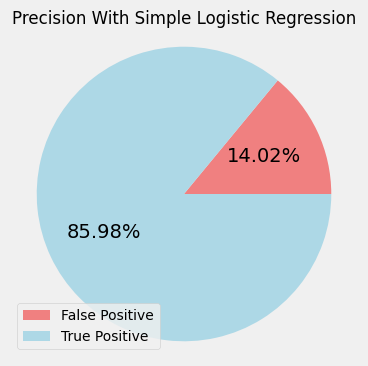

In [59]:
 # Data to plot
labels = 'False Positive', 'True Positive'
sizes = [1-precision, precision]
colors = ['lightcoral', 'lightblue'] 
# Plot
plt.figure(figsize=(4,4))
plt.pie(sizes, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.title('Precision With Simple Logistic Regression', fontsize=12) 
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()

In [60]:
accuracy = float(true_positive + true_negative)/float(true_positive + false_positive + false_negative + true_negative)
accuracy

0.859370143996685

We are still getting a abnormaly high number, which means the model is still predicting that all the loans will be paid off.

### Weighting Errors To Improve Performance
We will add weight to mistakes in order to penalize the model when it overfits, that way we can improve the performance of the model.

In [61]:
'''lr = LogisticRegression(class_weight="balanced")
kf = KFold(features.shape[0], random_state=1)
predictions = cross_val_predict(lr, features, target, cv=kf)
predictions = pd.Series(predictions)


false_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 0)
false_positive = len(predictions[false_positive_filter])

true_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 1)
true_positive = len(predictions[true_positive_filter])

false_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 1)
false_negative = len(predictions[false_negative_filter])

true_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 0)
true_negative = len(predictions[true_negative_filter])

true_positive_rate = float(true_positive)/float((true_positive + false_negative))
false_positive_rate = float(false_positive)/float((false_positive + true_negative))

print(float(true_positive_rate))
print(float(false_positive_rate))'''


from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Initialize Logistic Regression with class balancing
lr = LogisticRegression(class_weight="balanced")

# Set up KFold with the correct parameters
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform cross-validation and predictions
predictions = cross_val_predict(lr, features, target, cv=kf)
predictions = pd.Series(predictions)

# Evaluate the model's performance
false_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 0)
false_positive = len(predictions[false_positive_filter])

true_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 1)
true_positive = len(predictions[true_positive_filter])

false_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 1)
false_negative = len(predictions[false_negative_filter])

true_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 0)
true_negative = len(predictions[true_negative_filter])

true_positive_rate = float(true_positive) / float((true_positive + false_negative))
false_positive_rate = float(false_positive) / float((false_positive + true_negative))

print("True Positive Rate:", true_positive_rate)
print("False Positive Rate:", false_positive_rate)

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

True Positive Rate: 0.5435129680392806
False Positive Rate: 0.36140350877192984


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
accuracy = float(true_positive + true_negative)/float((true_positive + false_positive+ false_negative + true_negative))
accuracy

0.5568476121413032

In [63]:
precision = float(true_positive)/float(true_positive + false_positive)
precision

0.90215

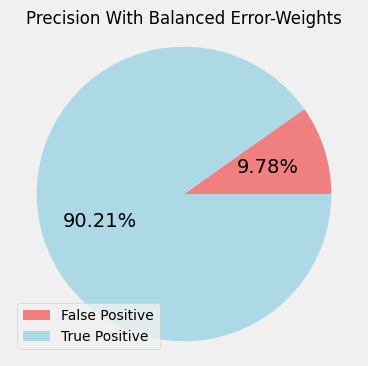

In [64]:
# Data to plot
labels = 'False Positive', 'True Positive'
sizes = [1-precision, precision]
colors = ['lightcoral', 'lightblue'] 
# Plot
plt.figure(figsize=(4,4))
plt.pie(sizes, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.title('Precision With Balanced Error-Weights', fontsize=12) 
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()

By weighting the algorithm we went from 99.87% of false positive to 39.85%. This is a good divergence.

In [65]:
'''from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_predict

cross_val_predict, KFold

penalty = {0: 10,
           1: 1
          }

lr = LogisticRegression(class_weight=penalty)
kf = KFold(features.shape[0], random_state=42)
predictions = cross_val_predict(lr, features, target, cv= kf)
predictions = pd.Series(predictions)'''

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold
import pandas as pd

# Define class weights
penalty = {0: 10, 1: 1}

# Initialize Logistic Regression with custom class weights
lr = LogisticRegression(class_weight=penalty)

# Set up KFold with correct parameters
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and predictions
predictions = cross_val_predict(lr, features, target, cv=kf)
predictions = pd.Series(predictions)


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [66]:
false_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 0)
false_positive = len(predictions[false_positive_filter])

true_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 1)
true_positive = len(predictions[true_positive_filter])

false_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 1)
false_negative = len(predictions[false_negative_filter])

true_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 0)
true_negative = len(predictions[true_negative_filter])

true_positive_rate = float(true_positive)/float((true_positive + false_negative))
false_positive_rate = float(false_positive)/float((false_positive + true_negative))

print(float(true_positive_rate))
print(float(false_positive_rate))

0.21788113383739494
0.08568790397045245


In [67]:
accuracy = float(true_positive + true_negative)/float(true_positive + false_positive+ false_negative + true_negative)
accuracy

0.31554957008183987

In [68]:
precision = float(true_positive)/float(true_positive + false_positive)
precision

0.9397167727686111

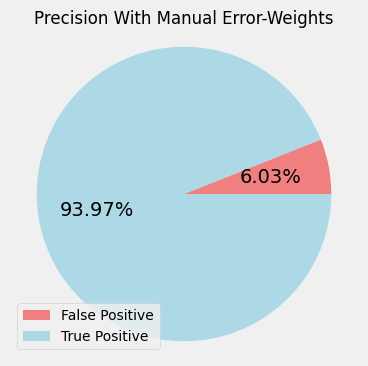

In [69]:
# Data to plot
labels = 'False Positive', 'True Positive'
sizes = [1-precision, precision]
colors = ['lightcoral', 'lightblue'] 
# Plot
plt.figure(figsize=(4,4))
plt.pie(sizes, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.title('Precision With Manual Error-Weights', fontsize=12) 
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()

### Try Random Forest
We try to fit the data with the random forest classifier of scikit-learn in order to increase the performance of our model. 


In [70]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_predict

rf = RandomForestClassifier(class_weight="balanced", random_state=1)
kf = KFold(features.shape[0], random_state=42)

predictions = cross_val_predict(rf, features, target, cv=kf)
predictions = pd.Series(predictions)'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
import pandas as pd

# Initialize Random Forest Classifier with balanced class weights
rf = RandomForestClassifier(class_weight="balanced", random_state=1)

# Set up KFold with correct parameters
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and predictions
predictions = cross_val_predict(rf, features, target, cv=kf)
predictions = pd.Series(predictions)

In [72]:
false_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 0)
false_positive = len(predictions[false_positive_filter])

true_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 1)
true_positive = len(predictions[true_positive_filter])

false_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 1)
false_negative = len(predictions[false_negative_filter])

true_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 0)
true_negative = len(predictions[true_negative_filter])

true_positive_rate = float(true_positive)/float((true_positive + false_negative))
false_positive_rate = float(false_positive)/float((false_positive + true_negative))

print(float(true_positive_rate)) 
print(float(false_positive_rate))

0.9987649486399374
0.9959372114496768


In [73]:
accuracy = float(true_positive + true_negative)/float(true_positive + false_positive+ false_negative + true_negative)
accuracy

0.8592665492592976

In [74]:
precision = float(true_positive)/float(true_positive + false_positive)
precision

0.8601001322991517

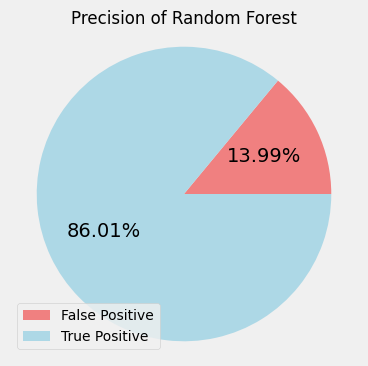

In [75]:
# Data to plot
labels = 'False Positive', 'True Positive'
sizes = [1-precision, precision]
colors = ['lightcoral', 'lightblue'] 
# Plot
plt.figure(figsize=(4,4))
plt.pie(sizes, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.title('Precision of Random Forest', fontsize=12) 
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()

This is a similar pie as the one we started with. 

## V. Conclusion
### Improvement
Different classification algorithms such as XGBoost, or even different machine learning architecture such as neural networks could provide better results. In at least one known case, it has be used by a FinTech company such as Underwrite.ai. Deep learning can be another way to discover and push the boundaries of what is possible in predicting the outcome of loans. Along with different algorithms, we could create more features, as the team at Stanford did with the zip code and U.S. census data. We could as well ensemble models (Raschka…) to make better predictions.

On a side note, relaxing the strict requirements could help capturing the false negative market and that could lead to better profitability to the bank that finds a way. This is on the business side and not on the machine learning side, but nonetheless, business problems are a driver in the implementation and deployment of machine learning models. Being able to serve this under-served niche would open opportunities to those customers and potentially increase the profit margin as it had been shown by the Grameen Bank. Machine learning can, in many ways, help us discover hidden value in the world. 